In [1]:
# rf201_composite.py from $ROOTSYS/tutorials/roofit
import ROOT

# Setup component pdfs
# ---------------------------------------

# Declare observable x
x = ROOT.RooRealVar("x", "x", 0, 10)

# Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
# their parameters
mean = ROOT.RooRealVar("mean", "mean of gaussians", 5)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 1)

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

# Build Chebychev polynomial pdf
a0 = ROOT.RooRealVar("a0", "a0", 0.5, 0., 1.)
a1 = ROOT.RooRealVar("a1", "a1", -0.2, 0., 1.)
bkg = ROOT.RooChebychev("bkg", "Background", x, ROOT.RooArgList(a0, a1))


# Method 1 - Two RooAddPdfs
# ------------------------------------------
# Add signal components

# Sum the signal components into a composite signal pdf
sig1frac = ROOT.RooRealVar(
    "sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
sig = ROOT.RooAddPdf("sig", "Signal", ROOT.RooArgList(
    sig1, sig2), ROOT.RooArgList(sig1frac))

# Add signal and background
# ------------------------------------------------

# Sum the composite signal and background
bkgfrac = ROOT.RooRealVar("bkgfrac", "fraction of background", 0.5, 0., 1.)
model = ROOT.RooAddPdf(
    "model", "g1+g2+a", ROOT.RooArgList(bkg, sig), ROOT.RooArgList(bkgfrac))

# Sample, fit and plot model
# ---------------------------------------------------

# Generate a data sample of 1000 events in x from model
data = model.generate(ROOT.RooArgSet(x), 1000)

# Fit model to data
model.fitTo(data)

# Plot data and PDF overlaid
xframe = x.frame(ROOT.RooFit.Title(
    "Example of composite pdf=(sig1+sig2)+bkg"))
data.plotOn(xframe)
model.plotOn(xframe)

# Overlay the background component of model with a dashed line
ras_bkg = ROOT.RooArgSet(bkg)
model.plotOn(xframe, ROOT.RooFit.Components(ras_bkg),
             ROOT.RooFit.LineStyle(ROOT.kDashed))

# Overlay the background+sig2 components of model with a dotted line
ras_bkg_sig2 = ROOT.RooArgSet(bkg, sig2)
model.plotOn(xframe, ROOT.RooFit.Components(ras_bkg_sig2),
             ROOT.RooFit.LineStyle(ROOT.kDotted))

# Print structure of composite pdf
model.Print("t")

# Method 2 - One RooAddPdf with recursive fractions
# ---------------------------------------------------

# Construct sum of models on one go using recursive fraction interpretations
#
#   model2 = bkg + (sig1 + sig2)
#
model2 = ROOT.RooAddPdf(
    "model",
    "g1+g2+a",
    ROOT.RooArgList(
        bkg,
        sig1,
        sig2),
    ROOT.RooArgList(
        bkgfrac,
        sig1frac),
    ROOT.kTRUE)

# NB: Each coefficient is interpreted as the fraction of the
# left-hand component of the i-th recursive sum, i.e.
#
#   sum4 = A + ( B + ( C + D)  with fraction fA, and fC expands to
#
#   sum4 = fA*A + (1-fA)*(fB*B + (1-fB)*(fC*C + (1-fC)*D))

# Plot recursive addition model
# ---------------------------------------------------------
model2.plotOn(xframe, ROOT.RooFit.LineColor(ROOT.kRed),
              ROOT.RooFit.LineStyle(ROOT.kDashed))
model2.plotOn(
    xframe,
    ROOT.RooFit.Components(ras_bkg_sig2),
    ROOT.RooFit.LineColor(
        ROOT.kRed),
    ROOT.RooFit.LineStyle(
        ROOT.kDashed))
model2.Print("t")

# Draw the frame on the canvas
c = ROOT.TCanvas("rf201_composite", "rf201_composite", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.4)
xframe.Draw()

c.SaveAs("rf201_composite.png")

Welcome to JupyROOT 6.24/06

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [-1e+30, 1e+30] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2' with range [-1e+30, 1e+30] of the RooGaussian 'sig2' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:Eval -- Evaluating RooAddPdf without a defined normalization set. This can lead to ambiguos coefficients definition and incorrect results. Use RooAddPdf::fixCoefNormalization(nset) to provide a normalization set for defining uniquely RooAddPdf coefficients!
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  Th

Info in <TCanvas::Print>: png file rf201_composite.png has been created


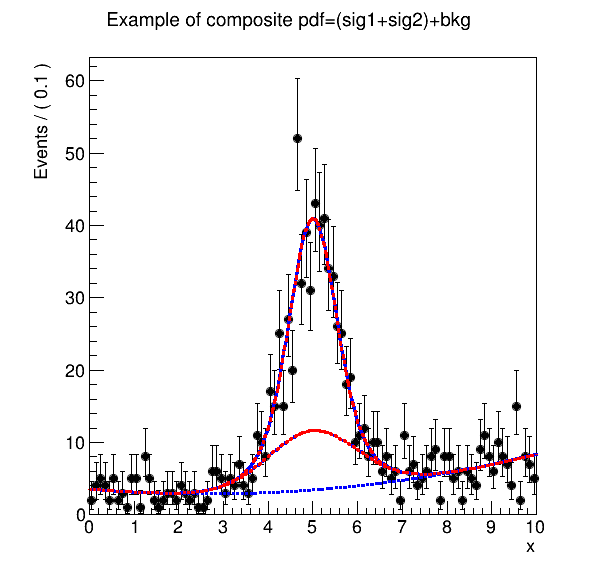

In [2]:
c.Draw()